In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("C:/data sets/diabetes.csv")

In [3]:
df=pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
#selecting Features
X=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=data.Outcome
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
#Split X and y into traing and test set
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.25 , random_state=0)

In [13]:
logreg=LogisticRegression(solver='liblinear')
logreg.fit(X_train , y_train)
y_pred= logreg.predict(X_test)

In [14]:
print("Accuracy:"),metrics.accuracy_score(y_test,y_pred)

Accuracy:


(None, 0.8072916666666666)

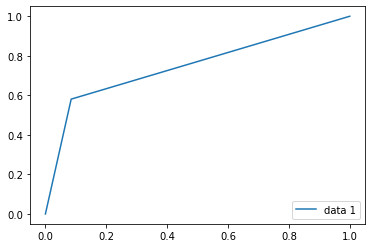

In [15]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

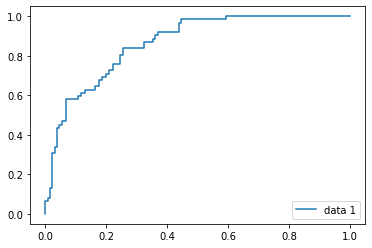

In [16]:
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1")
plt.legend(loc=4)
plt.show()

In [17]:
from sklearn.metrics import classification_report , confusion_matrix
logreg.classes_

array([0, 1], dtype=int64)

In [18]:
logreg.intercept_

array([-5.45417016])

In [19]:
logreg.coef_

array([[ 8.34611817e-02,  2.55666212e-02, -1.64869547e-02,
         5.59524539e-03, -5.38286506e-04,  5.43373306e-02,
         6.01724247e-01,  1.23642405e-02]])

In [20]:
logreg.predict_proba(X)

array([[0.34063692, 0.65936308],
       [0.88929435, 0.11070565],
       [0.28840974, 0.71159026],
       ...,
       [0.75398381, 0.24601619],
       [0.67081142, 0.32918858],
       [0.86387705, 0.13612295]])

In [21]:
logreg.predict(X)

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [22]:
logreg.score(X,y)

0.76953125

In [23]:
confusion_matrix(y,logreg.predict(X))

array([[443,  57],
       [120, 148]], dtype=int64)

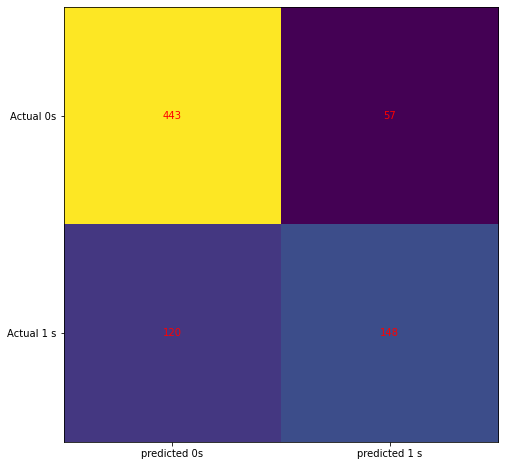

In [34]:
cm=confusion_matrix(y,logreg.predict(X))

fig , ax=plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('predicted 0s','predicted 1 s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1 s'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range (2):
        ax.text(j,i,cm[i,j], ha='center' , va='center', color= 'red' )
plt.show()        

In [32]:
print(classification_report(y,logreg.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       500
           1       0.72      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [33]:
model=LogisticRegression(solver='liblinear' , C=10 , random_state=0)
model.fit(X,y)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [35]:
df2=pd.DataFrame({"Pregnancies":[0],
                  "Glucose":[80], 
                  "BloodPressure":[72], 
                  "SkinThickness":[0],
                  "Insulin":[0],
                  "BMI":[23],
                  "DiabetesPedigreeFunction":[0.5],
                  "Age":[30],
                   "Outcome":[0]})

In [36]:
data2=data.append(df2)
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [40]:
X_train=data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']][:768]
y_train=data2[["Outcome"]][:768].values.reshape(-1,1)

In [41]:
X_test=data2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']][768:]

In [43]:
model2=LogisticRegression(solver='liblinear' , C=10 , random_state=0)
model2.fit(X_train,y_train)

C:\Users\sama\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=10, random_state=0, solver='liblinear')

In [44]:
y_pred=model2.predict(X_test)
y_pred

array([0], dtype=int64)

In [48]:
#remodeling  by changing logestic methods
X=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y=data.Outcome

In [54]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.25 , random_state=0)
model3=LogisticRegression(solver='liblinear' , C=5 , random_state=0)
##c=5 
model3.fit(X_train , y_train)
y_pred= model3.predict(X_test)

In [55]:
print(classification_report(y,model3.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       500
           1       0.73      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



In [57]:
### 
model4=LogisticRegression(solver='liblinear' ,fit_intercept=True , C=10 , random_state=0)
model4.fit(X_train , y_train)

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [59]:
print(classification_report(y,model4.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       500
           1       0.72      0.57      0.64       268

    accuracy                           0.77       768
   macro avg       0.76      0.73      0.74       768
weighted avg       0.77      0.77      0.77       768



In [65]:
### 
model5=LogisticRegression(solver='liblinear' ,fit_intercept= , C=10 , random_state=0)
model5.fit(X_train , y_train)

SyntaxError: invalid syntax (<ipython-input-65-4dc7518eec2e>, line 2)

In [61]:
print(classification_report(y,model6.predict(X)))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       500
           1       0.60      0.35      0.45       268

    accuracy                           0.69       768
   macro avg       0.66      0.61      0.62       768
weighted avg       0.68      0.69      0.67       768

